In [2]:
import random
from math import sin
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

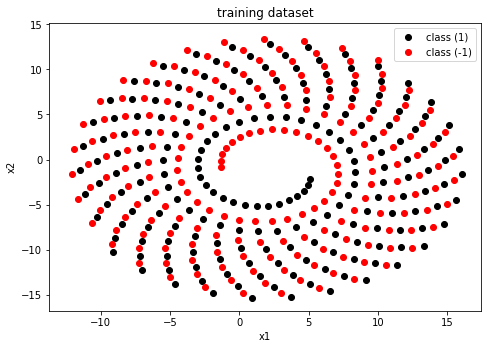

In [3]:
#Declare dataset index U
u = np.arange(1,201,1)

#Declare data points of class 1 (black)
x11 = 2 + (np.sin(0.2*u+8))*(np.sqrt(u+10))
x21 = -1 + (np.cos(0.2*u+8))*(np.sqrt(u+10))
#Declare data points of class -1 (red)
x10 = 2 + (np.sin(0.2*u-8))*(np.sqrt(u+10))
x20 = -1 + (np.cos(0.2*u-8))*(np.sqrt(u+10))


    

#Plot dataset
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set(title="training dataset", xlabel ="x1", ylabel="x2")
ax.scatter(x11, x21, marker="o", color ='black', label='class (1)')
ax.scatter(x10, x20, marker="o", color= 'red', label='class (-1)')
ax.legend()

# Creating input dataset and output dataset
Class -1 is replaced by class 0, in order to use sigmoid funtion in output layer

In [4]:
dataset = list() 
inputset = list() 
outputset = list() 

for i in range(200):
    dataset.append([x11[i], x21[i], 1]) 
    dataset.append([x10[i], x20[i], 0])  
    
random.shuffle(dataset)

for sublist in dataset:
    inputset.append(sublist[:2])
    outputset.append(sublist[2])
    
inputset = np.array(inputset)
outputset = np.array(outputset)

# Clustering dataset into 50 clusters and plotting the cluster centroids

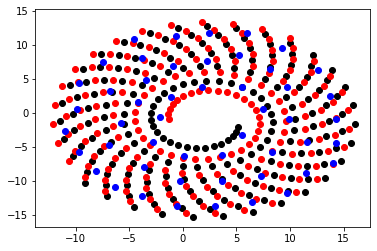

In [5]:
k_means = KMeans(n_clusters=50).fit(inputset)

plt.scatter(x11, x21, marker="o", color ='black')
plt.scatter(x10, x20, marker="o", color= 'red')
plt.scatter(k_means.cluster_centers_[:,0], k_means.cluster_centers_[:,1], marker="o", color ='blue')

# Calculating the standard deviations (sigma) for 50 clusters
hier ist sigma = dMax/(sqrt(2k) <br/><br/>
dMax ist der maximale Wert von den Abständen, die zwischen 2 von aller RBF Zentren berechnet werden<br/>
k ist die Anzahl von Clustern = 50<br/>

In [6]:
dMax = 0

for c1 in k_means.cluster_centers_:
    for c2 in k_means.cluster_centers_:
        d_array = np.abs(c1 - c2)
        d = np.linalg.norm(d_array)
        if d > dMax:
            dMax = d

sigma = np.repeat(dMax / np.sqrt(2*50), 50)

# Declaring Gauss function for RBF layer and sigmoid function for output layer
Aktivierungsfunktion für RBF Neuronen wie gegeben in der Vorlesung wird hier benutzt

In [7]:
def rbf(x, c, sigma):
    r = 0
    for i in range(x.shape[0]):
        r += (x[i]-c[i])**2
    return np.exp((-1)*r / (2 * (sigma**2)))   

def tanh_derative(x):
    return 1 - (np.tanh(x))**2

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derative(x):
    return sigmoid(x)*(1-sigmoid(x))

# RBF Net class

In [8]:
class RBFNet:
    """Implementation of a Radial Basis Function Network"""
    def __init__(self, c , w, sigma):
        self.c = c   #centroids
        self.w = w   #weights of output layer
        self.b = 0   #bias of output layer
        self.sigma = sigma #standard deviation
    
    def predict(self, x):
        y_pred = []
        for i in range(x.shape[0]):
            a = np.array([rbf(x[i], c_h, sigma_h) for c_h, sigma_h in zip(self.c, self.sigma)])
            z = a.dot(self.w) + self.b
            y = sigmoid(z)
            y_pred.append(y)
        return np.array(y_pred)
    
    def train(self, x, y_target, learning_rate, epochs):
        
        for epoch in range(epochs):
            loss = 0
            for i in range(x.shape[0]):
                
                # forward pass
                a = np.array([rbf(x[i], c_h, sigma_h) for c_h, sigma_h in zip(self.c, self.sigma)])
                z = a.dot(self.w) + self.b
                y_pred = sigmoid(z)
           
                loss += (y_target[i] - y_pred)**2
 
                # backward pass + online update  
                # update weights 
                for j in range(self.w.shape[0]):
                    self.w[j][0] = self.w[j][0] + (learning_rate  * (y_target[i] - y_pred) * sigmoid_derative(z) * a[j])
                    self.sigma[j] = self.sigma[j] + (learning_rate  * (y_target[i] - y_pred) * sigmoid_derative(z) * a[j])
              
                #update bias
                self.b = self.b  + (learning_rate * (y_target[i] - y_pred) * sigmoid_derative(z))
            
            #print loss value and accuracy of model after each training epoch
            print(epoch, ".Epoch ,", 'Loss: {0:.2f},'.format(loss[0]/400),  'Accuracy: {0:%}'.format((400-loss[0])/400) )

# Declaring the RBF Net model

In [9]:
n_hidden = 50
n_output = 1 
weights = np.random.uniform(low =-1, high =1, size=(n_hidden,n_output))

RBFnet1 = RBFNet(k_means.cluster_centers_, weights, sigma)

# Training the model

In [10]:
RBFnet1.train(inputset, outputset, learning_rate = 1e-2, epochs = 100)

0 .Epoch , Loss: 0.28, Accuracy: 71.626970%
1 .Epoch , Loss: 0.28, Accuracy: 71.838427%
2 .Epoch , Loss: 0.28, Accuracy: 72.012973%
3 .Epoch , Loss: 0.28, Accuracy: 72.159922%
4 .Epoch , Loss: 0.28, Accuracy: 72.286314%
5 .Epoch , Loss: 0.28, Accuracy: 72.397388%
6 .Epoch , Loss: 0.28, Accuracy: 72.496994%
7 .Epoch , Loss: 0.27, Accuracy: 72.587937%
8 .Epoch , Loss: 0.27, Accuracy: 72.672251%
9 .Epoch , Loss: 0.27, Accuracy: 72.751397%
10 .Epoch , Loss: 0.27, Accuracy: 72.826427%
11 .Epoch , Loss: 0.27, Accuracy: 72.898091%
12 .Epoch , Loss: 0.27, Accuracy: 72.966924%
13 .Epoch , Loss: 0.27, Accuracy: 73.033307%
14 .Epoch , Loss: 0.27, Accuracy: 73.097511%
15 .Epoch , Loss: 0.27, Accuracy: 73.159728%
16 .Epoch , Loss: 0.27, Accuracy: 73.220096%
17 .Epoch , Loss: 0.27, Accuracy: 73.278712%
18 .Epoch , Loss: 0.27, Accuracy: 73.335646%
19 .Epoch , Loss: 0.27, Accuracy: 73.390949%
20 .Epoch , Loss: 0.27, Accuracy: 73.444661%
21 .Epoch , Loss: 0.27, Accuracy: 73.496812%
22 .Epoch , Loss: 0.

# Plotting the predicted outputs after training
Das Modell hat eine Genauigkeit von 75%.<br/>
Ich glaube es liegt daran, dass ich kein geeignetes Algorithmus für die Berechnung von Sigma gefunden. Ich habe zwar denselben Sigmaswert für alle RBF-Zentren verwendet.

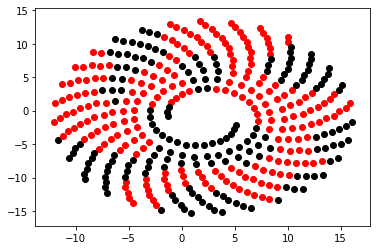

In [11]:
y_pred = RBFnet1.predict(inputset)

for i in range(400):
    if y_pred[i] > 0.5:
        plt.scatter(inputset[i][0], inputset[i][1] , marker="o", color='black')
    else :    
        plt.scatter(inputset[i][0], inputset[i][1] , marker="o", color='red')

# Plotting the predicted outputs from inputset (x1,x2) = [-16,16][-16,16]<br/>

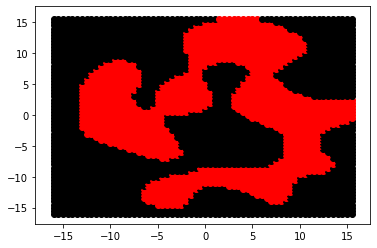

In [15]:
for y in np.arange(-16, 16, 0.5): #mit 0,1 wird bei mir unendlich laufen
    for x in np.arange(-16, 16, 0.5):
        prediction = RBFnet1.predict(np.array([[x, y]]))
        if prediction > 0.5:
            color = 'black'
        else:
            color = 'red'

        plt.scatter(x, y, c=color)
        
plt.show()